# 情報活用講座：　ケモインフォマテックス 編　
# 第3回：　記述子計算・フラグメントカウント

## 底本
船津 公人、柴山 翔二郎 **『実践 マテリアルズインフォマティクス　Pythonによる材料設計のための機械学習』**、近代科学社、2020


## データセット
delaney-processed.csvは1128化合物の水溶性についてのデータセットです。このデータセットは、Delaneyの論文『ESOL: Estimating Aqueous Solubility Directly from Molecular Structure』で使用されたもので、分子の化学的特性とその生物学的活性の関係を調査するために使用されます。

"ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure", J. Chem. Inf. Comput. Sci. 44, 1000–1005 (2004) (DOI: 10.1021/ci034243x)  

Delaney-processed.csvは、分子の化学構造とその物理的・化学的特性の情報を含んでいます。具体的には、分子の化学式、SMILES表記、分子量、融点、沸点、溶解度などが含まれており、これらの特性は薬物探索や環境影響評価などの目的で使用されています。


1. Compound ID	：化合物ID
1. ESOL predicted log solubility in mols per litre　：水溶性log溶解度の予測値	
1. Minimum Degree：　最小次数	
1. Molecular Weight：分子量	
1. Number of H-Bond Donors	：　水素結合に関与するDonor数
1. Number of Rings	：芳香環の数	
1. Number of Rotatable Bonds　：　回転可能結合数	
1. Polar Surface Area　：　極性表面積	
1. measured log solubility in mols per litre：水溶性log溶解度の実測値	
1. smiles：SMILES表記

このデータセットは、化学的特性と生物学的活性の関係を解明するために機械学習や予測モデルの開発に使用されることがあります。特に、溶解度の予測に焦点を当てた研究や、薬物の吸収性や生物利用度などの予測モデルの構築に利用されることがあります。


## pythonライブラリ
Pythonプログラミングにおいてライブラリは、再利用可能なコードの集合であり、特定の機能やタスクを実現するための関数やクラスの集まりです。データ処理、可視化、機械学習、ディープラーニングなどの領域で幅広く活用されています。

**NumPy**：　高性能の数値計算やデータ処理に特化したPythonのライブラリです。NumPyは多次元の配列や行列を効率的に操作する機能を提供し、科学技術計算やデータ解析の分野で広く使用されています。

**Pandas**：　データ操作と解析のための高レベルのPythonライブラリです。Pandasは、テーブル形式のデータを効率的に処理し、データのフィルタリング、変換、集約、および結合などの機能を提供します。データの整形やクリーニング、欠損値の処理などを容易に行うことができます。

**Matplotlib**：　Pythonでデータを可視化するための強力なライブラリです。Matplotlibは、グラフや図を描画するための多様な機能を提供し、折れ線グラフ、ヒストグラム、散布図、バーチャートなどの多くのプロットスタイルをサポートしています。データの傾向や関係性を視覚的に理解するための強力なツールです。

**RDkit**：　RDKitは、化学情報学や薬学の分野で広く使用されるオープンソースのソフトウェア開発キットです。RDKitはPythonで実装されており、様々な化学情報の処理や分子の構造解析、化学反応の予測などをサポートします。

### ライブラリのインポート

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#日本語表示フォント用
import matplotlib as mpl
mpl.rcParams['font.family'] = 'MS Gothic'
mpl.rcParams['figure.figsize']=[12, 8]
mpl.rcParams['font.size']=14

from rdkit.Chem import MolFromSmarts, MolFromSmiles
from rdkit.Chem.Descriptors import descList

from warnings import filterwarnings
filterwarnings('ignore')# 警告を無視

### サンプルファイルの読み込み
第一回と同じく「data/delaney-solubility」フォルダーにあるdelaney-processed.csvをpandasの`read_csv()`で読み込みます。RDkitの`MolFromSmiles`関数を[smiles]列に適用してmol構造への変換オブジェクトを[mol]列とする流れも第一回と同じです。

In [3]:
df = pd.read_csv('./data/delaney-solubility/delaney-processed.csv')
df['Mol'] = df['smiles'].apply(MolFromSmiles)
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,Mol
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x0000021D143...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x0000021D143...
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x0000021D143...
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,<rdkit.Chem.rdchem.Mol object at 0x0000021D143...
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1,<rdkit.Chem.rdchem.Mol object at 0x0000021D143...
...,...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br,<rdkit.Chem.rdchem.Mol object at 0x0000021D143...
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x0000021D143...
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC,<rdkit.Chem.rdchem.Mol object at 0x0000021D143...
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C,<rdkit.Chem.rdchem.Mol object at 0x0000021D143...


## フラグメントカウント

分子のフラグメントとは、分子を構成する部分構造や断片のことで、独自の性質や機能を持つ化学的な単位です。フラグメント化することで、その分子の性質をより詳細に理解することのほか、化学反応や相互作用の解析に役立ちます。

ここでは、delaney-solubilityの1128化合物について、ベンゼン環のフラグメントを含む化合物について集計する流れを見てみることにします。

In [4]:
# ベンゼンの数え上げ
def count_rings(mol):
    fragment = MolFromSmarts('c1ccccc1')
    ret = mol.GetSubstructMatches(fragment)
    n_rings = len(ret)
    return n_rings

`GetSubstructMatches()`は、RDKitのMolオブジェクトのメソッドであり、特定のサブ構造を持つ分子を検索するために使用されます。

`GetSubstructMatches()`メソッドは、引数としてサブ構造のパターンを持つ別のMolオブジェクトを受け取ります。このパターンは、検索したい目的のサブ構造を表現するために使用されます。サブ構造のパターンに一致するすべての部分構造を見つけるため、複数の一致がある場合があります。戻り値は、部分構造に一致するすべての原子のインデックスのタプルのリストです。各タプルは、一致した部分構造の原子のインデックスの順序付きセットです。

以下は、`GetSubstructMatches()`メソッドの基本的な使用法の例です。この例では、`CCOc1ccc2nc(S(N)(=O)=O)sc2c1`というSMILES表記で表される化学構造から、`c1ccsc1`というサブストラクチャのサブ構造に一致する部分構造を見つけます。

```python
from rdkit import Chem

# Molオブジェクトの作成
mol = Chem.MolFromSmiles('CCOc1ccc2nc(S(N)(=O)=O)sc2c1')

# サブストラクチャのパターンを作成
substructure = Chem.MolFromSmarts('c1ccsc1')

# サブストラクチャに一致する部分構造の検索
matches = mol.GetSubstructMatches(substructure)

# 一致する部分構造の原子のインデックスを表示
for match in matches:
    print(match)
```



DataFrameの特定の列（Molという列名）に対して関数（funcという関数名）を適用し、その結果をcount変数に格納することにします。

In [5]:
func = count_rings 
count = df['Mol'].apply(func)
count

0       1
1       1
2       0
3       5
4       0
       ..
1123    0
1124    0
1125    0
1126    0
1127    1
Name: Mol, Length: 1128, dtype: int64

1128化合物に対してベンゼン環を含む個数が計算されました。それを次に可視化してみることにします。

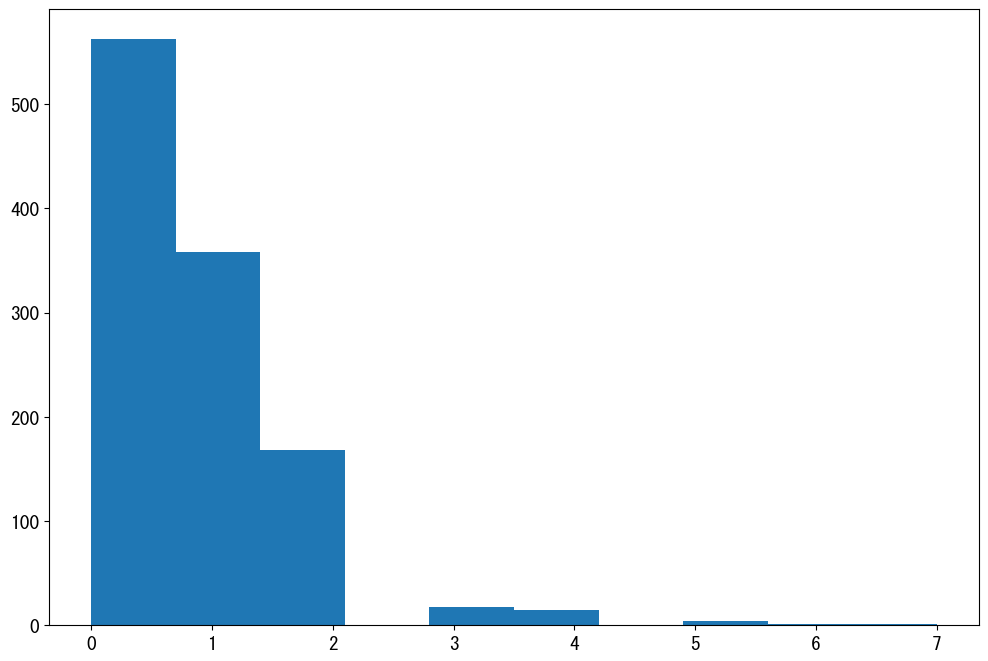

In [6]:
# 図5.1　六員環の出現回数
plt.hist(count)
plt.show()

## フラグメントカウントを使ったQSPR

QSPR（Quantitative Structure-Property Relationship）は構造活性相関とも呼ばれ、ケモインフォマティクス分野において、化学物質の分子構造と物性（性質）との間の定量的な関係を研究する手法です。QSPRは、分子の構造情報を数値的な特徴量として表現し、それらの特徴量と物性データとの間に数学的な関係を見つけ出すことを目指します。

QSPRは、物性として溶解度、融点、沸点、蒸気圧、分配係数などさまざまな化学的・物理的性質を対象とすることができます。例えば、ある化合物の分子構造情報からその溶解度を予測するモデルを構築することができます。

In [7]:
from numpy import array as np_array

FingerPrintのうち、接頭に'fr_'を含む特徴量のみをリスト化します。

In [8]:
listFreq = [key for key in dict(descList).keys() if key.startswith('fr_')]
list_functions = [dict(descList)[k] for k in listFreq]

`startswith()`は、Pythonの文字列メソッドの一つであり、ある文字列が指定した接頭辞（prefix）で始まるかどうかを判定するために使用されます。

このメソッドは以下のような構文を持ちます：

```python
str.startswith(prefix, start, end)
```

- `str`: 接頭辞の有無を確認したい文字列。
- `prefix`: 接頭辞として検証する文字列。
- `start` (オプション): 検索を開始する位置のインデックス。デフォルトは0。
- `end` (オプション): 検索を終了する位置のインデックス。デフォルトは文字列の末尾。

`startswith()`メソッドは、指定した文字列が接頭辞として一致する場合には`True`を返し、一致しない場合には`False`を返します。

以下はいくつかの使用例です：

```python
str1 = "Hello, world!"
print(str1.startswith("Hello"))  # True
print(str1.startswith("Hola"))   # False

str2 = "OpenAI ChatGPT"
print(str2.startswith("OpenAI", 5))  # False (位置5以降の部分で検索)
print(str2.startswith("Chat", 8, 12))  # True (位置8から12の範囲で検索)
```

`startswith()`は、文字列の前置詞を確認する際に便利です。例えば、ある文字列が特定の接頭辞で始まるかどうかを確認したり、特定のプレフィックスを持つファイル名をフィルタリングする場合などに利用されます。

In [10]:
def mol2freqs(mol):
    " 85 部分構造の出現回数 "
    return list(map(lambda f: f(mol), list_functions))

In [12]:
func = mol2freqs 
X = df['Mol'].apply(func)
X

0       [0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
1123    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1124    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, ...
1125    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1126    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1127    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Mol, Length: 1128, dtype: object

In [13]:
X2 = np_array(X.tolist())
X2

array([[0, 7, 7, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

ここでは、tolist()メソッドを使い、NumPy配列やPandasのSeriesやDataFrameなどのオブジェクトをPythonのリストに変換しています。。

### 主成分分析（PCA)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

`sklearn.pipeline`モジュールの`make_pipeline`関数は、scikit-learnライブラリで機械学習パイプラインを簡単に作成するための便利な関数です。

機械学習パイプラインは、複数のデータ変換ステップとモデルの組み合わせからなる処理フローです。パイプラインには、データの前処理、特徴量の抽出、特徴量の選択、モデルの訓練などのステップが含まれることがあります。パイプラインを使用することで、これらのステップを順番に実行することができます。

`make_pipeline`関数は、複数の変換器（データ変換ステップ）とオプションの推定器（モデル）を連結してパイプラインを作成します。関数の構文は以下の通りです：

```python
make_pipeline(*steps, **kwargs)
```

- `*steps`は、パイプラインの各ステップとして使用する変換器や推定器の引数です。変換器や推定器は、データを受け取り変換または予測を行うオブジェクトでなければなりません。ステップは、パイプライン内での実行順序に従って配置されます。

- `**kwargs`は、オプションのパラメータを指定するための引数です。

以下は、`make_pipeline`関数の使用例です：

```python
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# パイプラインの作成
pipeline = make_pipeline(StandardScaler(), SVC())

# パイプラインを使用してモデルを訓練
pipeline.fit(X_train, y_train)

# パイプラインを使用して予測を行う
y_pred = pipeline.predict(X_test)
```

この例では、`StandardScaler()`を使ってデータのスケーリングを行い、`SVC()`（サポートベクターマシン分類器）を使ってモデルの訓練と予測を行っています。`make_pipeline`関数により、スケーラーと分類器が自動的にパイプライン内で連結され、順番に実行されます。

`make_pipeline`関数は、パイプライン内の各ステップに対して一意の名前を自動的に生成します。例えば、`StandardScaler()`のステップには自動的に名前が割り当てられますが、明示的に指定することも可能

です。

パイプラインを使用することで、複数のステップを効率的に実行し、モデルの訓練や予測の手続きを簡潔かつ再利用可能にすることができます。

In [19]:
pca = make_pipeline(StandardScaler(), PCA())
T = pca.fit_transform(X2)

Pythonのscikit-learnライブラリには、主成分分析（Principal Component Analysis, PCA）を実行するための`PCA`クラスがあります。`PCA`クラスの`fit_transform()`メソッドは、データセットに対してPCA変換を実行し、データを新しい座標空間に変換するために使用されます。

`fit_transform()`メソッドの具体的な動作は以下の通りです：

1. `fit_transform()`メソッドは、`PCA`クラスのインスタンスに対して呼び出されます。

2. `fit_transform()`メソッドは、与えられたデータセットを受け取り、PCAモデルを構築します。このモデルは、データセットの特徴量間の相関を解析し、主成分を抽出します。

3. データセットの各サンプルが、新しい座標空間に変換されます。変換されたデータは、元のデータセットと同じ行数を持ちながら、特徴量の数が減少します。主成分の数は、PCAモデルの設定や指定された次元数によって決まります。

4. 変換されたデータは、新しい座標空間での位置を表す特徴量の値として返されます。

以下は、`fit_transform()`メソッドの使用例です：

```python
from sklearn.decomposition import PCA

# PCAのインスタンス化
pca = PCA(n_components=2)  # 2次元の主成分を抽出

# データセットのPCA変換
transformed_data = pca.fit_transform(data)
```

この例では、`PCA`クラスのインスタンスを作成し、`n_components`パラメータを設定して主成分の数を指定しています。`fit_transform()`メソッドは、`data`というデータセットを受け取り、PCA変換を実行して新しい座標空間にデータを変換します。変換されたデータは、`transformed_data`という変数に格納されます。

PCAは次元削減手法としてよく使われます。`fit_transform()`メソッドを使用することで、高次元のデータを低次元の特徴量に変換し、データの可視化や次元の圧縮などの目的で使用することができます。

In [18]:
ratio_ = dict(pca.steps)['pca'].explained_variance_ratio_

PCA（Principal Component Analysis）の`explained_variance_ratio_`は、PCA変換によって抽出された各主成分の分散の割合を表す属性です。この属性は、データセットの各主成分が元のデータセットの分散のどれだけを説明しているかを示すために使用されます。

具体的には、`explained_variance_ratio_`属性は、PCA変換によって抽出された主成分の分散の割合を、昇順に格納された配列として返します。配列の各要素は、対応する主成分が元のデータの分散の何割を説明しているかを示します。

以下は、`explained_variance_ratio_`属性の使用例です：

```python
from sklearn.decomposition import PCA

# PCAのインスタンス化
pca = PCA(n_components=3)  # 3次元の主成分を抽出

# データセットのPCA変換と分散の割合の取得
transformed_data = pca.fit_transform(data)
variance_ratio = pca.explained_variance_ratio_
```

この例では、`PCA`クラスのインスタンスを作成し、`n_components`パラメータを設定して主成分の数を指定しています。`.fit_transform()`メソッドによって、`data`というデータセットをPCA変換し、新しい座標空間にデータを変換しています。その後、`explained_variance_ratio_`属性を使用して、各主成分の分散の割合を取得しています。

`explained_variance_ratio_`の合計は、全体の分散の割合を示し、一般的には1に近づきます。これを使用することで、主成分がデータの分散のどれだけをカバーしているかを把握することができます。たとえば、`explained_variance_ratio_`が`[0.6, 0.3, 0.1]`となっていれば、最初の主成分がデータの60％の分散を説明し、2番目の主成分が30％、3番目の主成分が10％を説明していることを示します。

この情報は、主成分の数を選択する際や、次元削減の目的でPCAを使用する際に役立ちます。高い分散の割合を持つ主成分の数を選択することで、元のデータセットの情報をできるだけ保持しながら、低次元の特徴空間にデータを変換することができます。

In [19]:
ratio_

array([7.63478775e-02, 5.47037955e-02, 4.53185388e-02, 4.10410177e-02,
       3.93397163e-02, 3.36832123e-02, 3.20551739e-02, 3.05790799e-02,
       2.63314623e-02, 2.60405210e-02, 2.44758196e-02, 2.42752653e-02,
       2.23852440e-02, 2.05474945e-02, 2.02990948e-02, 1.84117164e-02,
       1.82974702e-02, 1.69472784e-02, 1.67634597e-02, 1.66078148e-02,
       1.62567259e-02, 1.58672724e-02, 1.55042257e-02, 1.53698279e-02,
       1.52808582e-02, 1.49749819e-02, 1.48462196e-02, 1.46272924e-02,
       1.45305383e-02, 1.44910950e-02, 1.43196781e-02, 1.42334121e-02,
       1.39869322e-02, 1.35529882e-02, 1.32365360e-02, 1.29885845e-02,
       1.21020507e-02, 1.18545263e-02, 1.13832862e-02, 1.06839591e-02,
       1.05479689e-02, 1.03479836e-02, 1.00956554e-02, 9.14842538e-03,
       8.78016418e-03, 8.15441026e-03, 7.72985693e-03, 7.11647744e-03,
       6.87960590e-03, 5.96865386e-03, 5.35664491e-03, 4.44941716e-03,
       4.02580527e-03, 3.59798351e-03, 3.30920367e-03, 2.72997491e-03,
      

NameError: name 'ratio_' is not defined

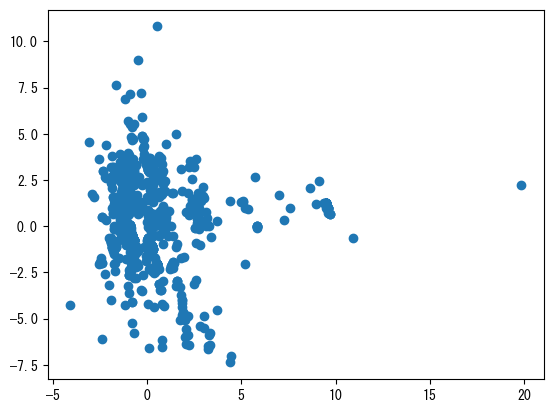

In [20]:
# 図5.2(a)　PCA第一主成分、第二主成分

plt.plot(T[:,0], T[:,1], 'o')

plt.xlabel('第1主成分 {:.2f}%'.format(ratio_[0]*100))
plt.ylabel('第2主成分 {:.2f}%'.format(ratio_[1]*100))

plt.axis('square')
plt.show()

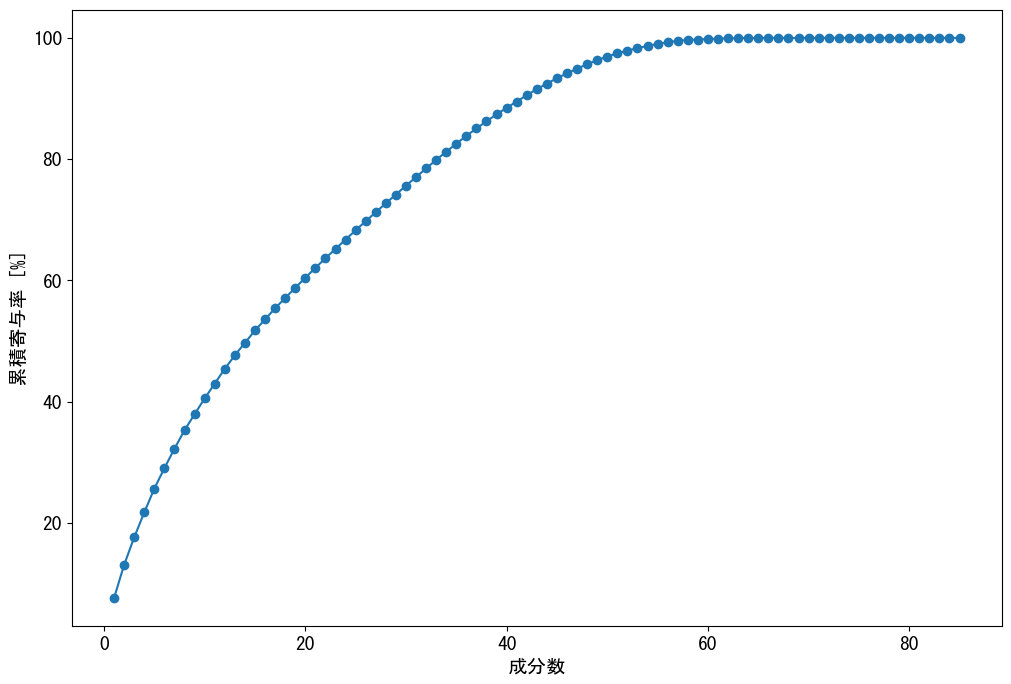

In [27]:
# 図5.2(b)　累積寄与率

from numpy import cumsum, arange

plt.figure()
plt.plot(arange(1,1+len(ratio_)), 100*cumsum( ratio_ ),'o-')
plt.xlabel('成分数')
plt.ylabel('累積寄与率 [%]')
plt.show()

### RDKit記述子

In [28]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Descriptors import descList
from pandas import read_csv
from numpy import array as np_array, matrix as np_matrix

In [33]:
df = pd.read_csv('../data/delaney-solubility/delaney-processed.csv')

In [35]:
list_functions = list(dict(descList).values())

In [36]:
def mol2rdkit_desc(mol):
    " RDKit descriptors "
    return list(map(lambda f: f(mol), list_functions))

In [37]:
func = mol2rdkit_desc

df['Mol'] = df.smiles.apply(MolFromSmiles)

X = df.Mol.apply(func)
X2 = np_array(X.tolist())

In [38]:
pca = make_pipeline(StandardScaler(), PCA())
T = pca.fit_transform(X2)

In [39]:
ratio_ = dict(pca.steps)['pca'].explained_variance_ratio_

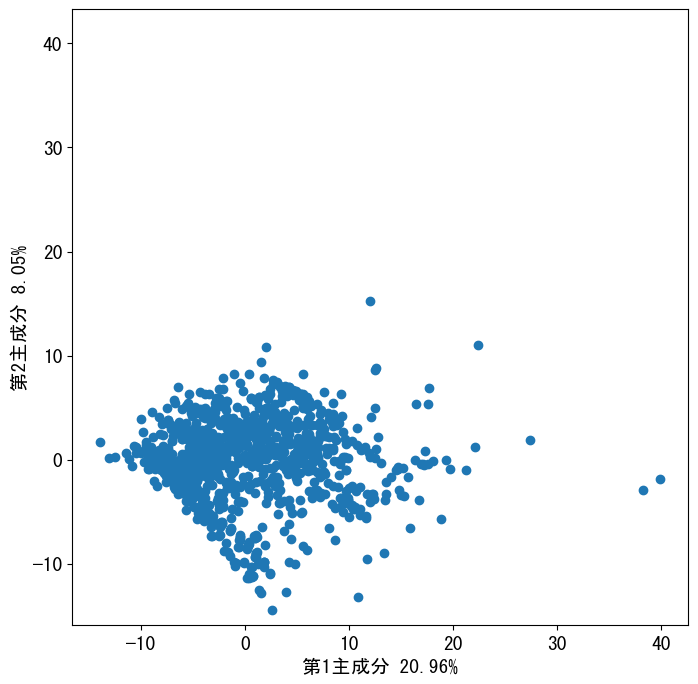

In [43]:
# 図5.3(a)　PCA第一主成分、第二主成分

plt.plot(T[:,0], T[:,1], 'o')

plt.xlabel('第1主成分 {:.2f}%'.format(ratio_[0]*100))
plt.ylabel('第2主成分 {:.2f}%'.format(ratio_[1]*100))
plt.axis('square')
plt.show()

Text(0, 0.5, '累積寄与率 [%]')

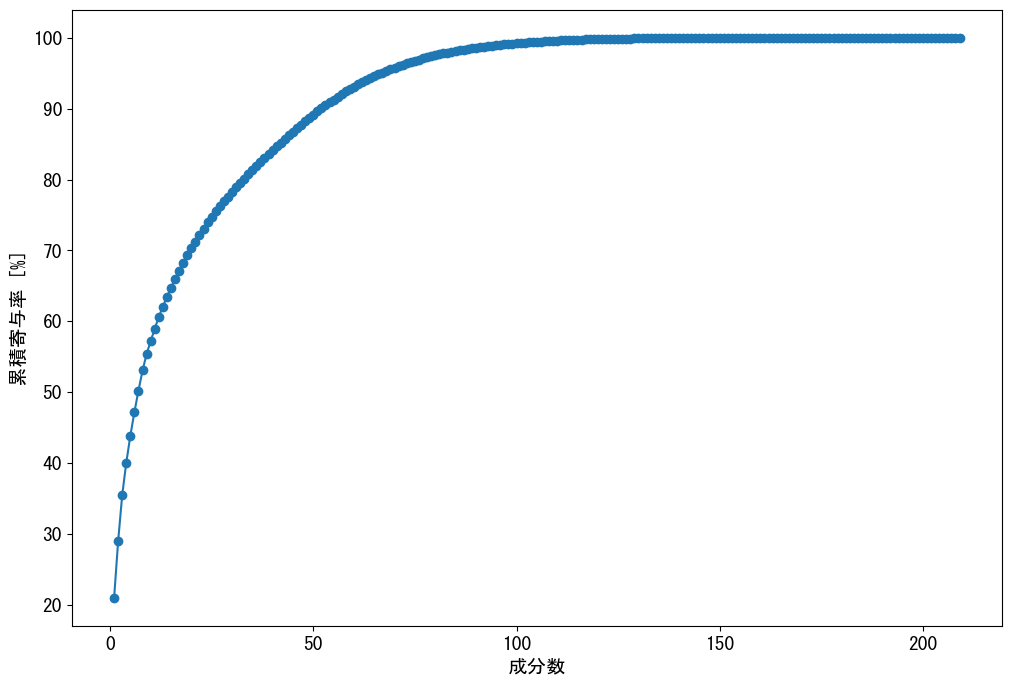

In [42]:
# 図5.3(b)　累積寄与率

plt.figure()
plt.plot(arange(1,1+len(ratio_)), 100*cumsum( ratio_ ),'o-')
plt.xlabel('成分数')
plt.ylabel('累積寄与率 [%]')

### MODERD

In [44]:
from mordred import Calculator as mord_calc, descriptors

In [45]:
df = read_csv('../data/delaney-solubility/delaney-processed.csv')
df['Mol'] = df.smiles.apply(MolFromSmiles)

In [46]:
calc2d = mord_calc(descriptors, ignore_3D=False)

In [47]:
descs2d = df.Mol.apply(calc2d)
dfX = calc2d.pandas(df.Mol)
print('data shape', dfX.shape)

100%|██████████| 1128/1128 [00:42<00:00, 26.80it/s]


data shape (1128, 1826)


In [49]:
# 標準化
sc = StandardScaler()
Xsc = sc.fit_transform(dfX)

is_nonnan = np.sum(np.isnan(Xsc), axis=0)==0

C:\Users\Matsunami\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Matsunami\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Matsunami\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [50]:
# 主成分分析
pca = make_pipeline(StandardScaler(),  PCA())
T = pca.fit_transform(dfX.iloc[:, np.where(is_nonnan)[0]])

In [51]:
#寄与率の計算
contrib_=pca.steps[-1][-1].explained_variance_ratio_

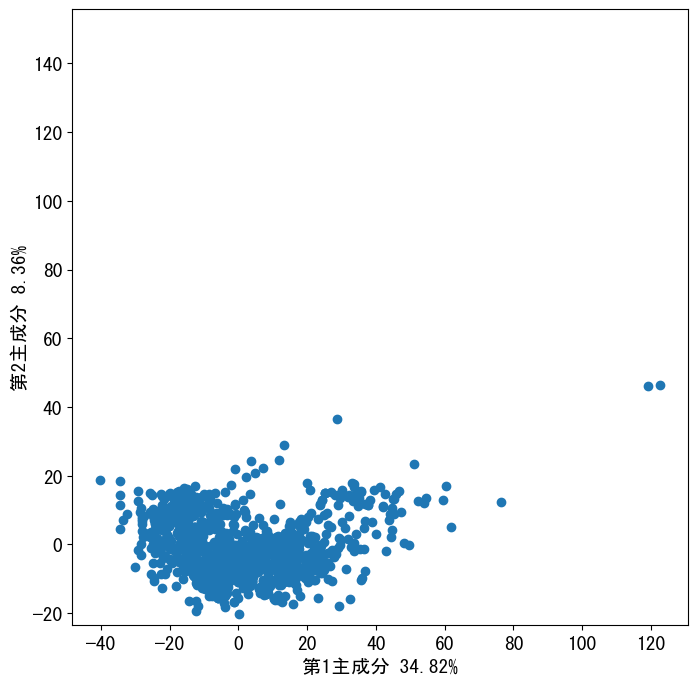

In [53]:
# 図5.4(a)　PCA第一主成分、第二主成分
plt.plot(*T[:,:2].T, 'o')

plt.xlabel('第1主成分 {:.2f}%'.format(100*contrib_[0]))
plt.ylabel('第2主成分 {:.2f}%'.format(100*contrib_[1]))
plt.axis('square')
plt.show()

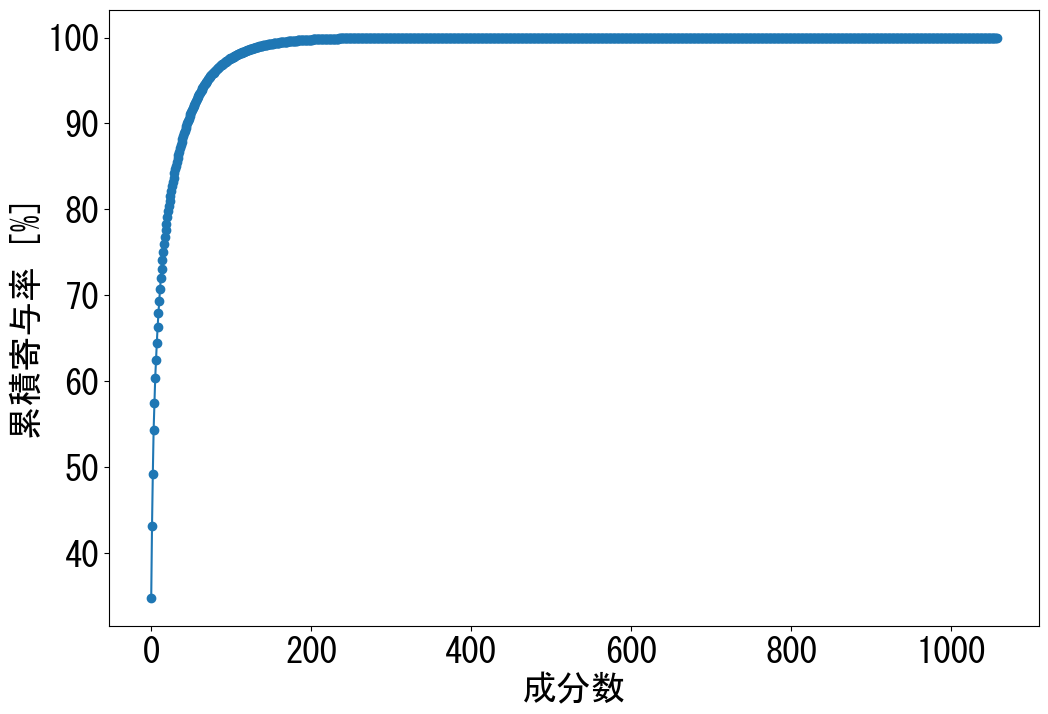

In [28]:
# 図5.4(b)　累積寄与率
plt.plot(np.cumsum(contrib_)*100, 'o-')
plt.xlabel('成分数')
plt.ylabel('累積寄与率 [%]')
plt.show()
